In [1]:
from pylab import *
%matplotlib inline

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01): #Runge Kutta de segundo orden
    if (x[1]-x[0])<=5*h:
        h=(x[1]-x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i])
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        #evaluando en el i-esimo
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i],args)
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [3]:
def ec_mov(r_v,t,fric=0,g=9.8,m=1): #ecuaciones de movimiento
    u=sqrt(r_v[2]**2+r_v[3]**2)
    dx=r_v[2]  #velocidad en r_v=(x,y,vx,vy)=(0,1,2,3) r=(pos),v=(vel)
    dy=r_v[3]
    if fric==0:
        dvx,dvy=0,-(g/m)
        #print "No use modelo de fricción"
    else:
        dvx=-(fric([r_v[2],r_v[3]]))[0]
        dvy=-(g/m)-(fric([r_v[2],r_v[3]]))[1]
        #print "Use modelo de fricción"
    return array([dx,dy,dvx,dvy])

In [4]:
#Modelos de friccion
def fric_id(v): #friccion ideal
    return array([0,0])

def fric_v(v,gamma=0.1):
    f_x=gamma*v[0]
    f_y=gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v=sqrt(v[0]**2+v[1]**2)
    f_x=gamma*norm_v*v[0]
    f_y=gamma*norm_v*v[1]
    return array([f_x,f_y])
    

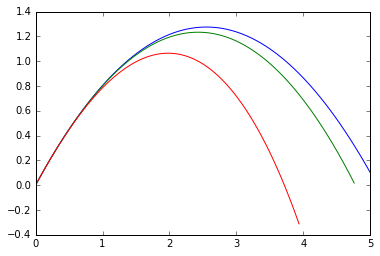

In [5]:
p=[0,0,5,5]
t,sol_id=rk4(ec_mov,p,[0,1])
t,sol_fv=rk4(ec_mov,p,[0,1],fric_v)
t,sol_fv2=rk4(ec_mov,p,[0,1],fric_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])
show()

In [6]:
def rebote(r_v_i,mi_dt): #r_v_i es trayectori[i,:]
    dt_busqueda=mi_dt/2
    y_izq=r_v_i #obtenido de la trayectoria inicial
    t,sol=rk4(ec_mov,r_v_i,[0,dt_busqueda],fric_v) #cuatro puntos de la coordenada de la derecha
    y_med=sol[-1,:]#resultado de haber integrado a la mitad, ultimo punto se queda
    #print y_med
    while abs(y_izq[1])>1e-5: #mayor a error
        if y_izq[1]*y_med[1]<0:
            reinicio=y_izq #integra desde el mismo punto
        else:
            reinicio=y_med 
        dt_busqueda=dt_busqueda/2 #reduce tiempo de integracion
        t,sol=rk4(ec_mov,reinicio,[0,dt_busqueda],fric_v)
        y_izq=reinicio
        y_med=sol[-1,:]
    y_izq=array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

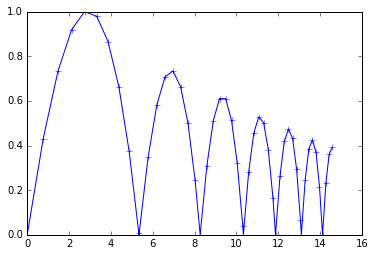

In [10]:
inicio=[0,0,8,5] #punto inicial para determinar raices
N=50 # 500 puntos de la trayectoria
trayectoria=zeros((N,len(inicio)))
trayectoria[0,:]=array(inicio)
mi_dt= .1 #intervalo de tiempo donde se guardara los datos obtenidos, es decir memoria, se integra de 0 a dt
for i in range(N-1): #punto d einicio
    t,sol_dt=rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fric_v2) # punto de integracion originalmente
    if sol_dt[-1,:][1]<0: #[1] primera entrada
        #print "buscando punto de rebote"
        punto=rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:]=punto
    #inicio=sol_dt[-1,:]
    else:
        trayectoria[i+1,:]=sol_dt[-1,:] #trayectoria[1,:]=array([1,2,3,4]) se llena la fila numero uno con datos dados, ultimo punto de la simulacion
#plot(sol_fv[:,0],sol_fv[:,1],'-')
plot(trayectoria[:,0],trayectoria[:,1],'+-')
show()

In [8]:
print ec_mov([1,1,1,1],1)
print ec_mov([1,1,1,1],1,fric_id)
print ec_mov([1,1,1,1],1,fric_v)
print ec_mov([1,1,1,1],1,fric_v2)

[ 1.   1.   0.  -9.8]
[ 1.   1.   0.  -9.8]
[ 1.   1.  -0.1 -9.9]
[ 1.          1.         -0.14142136 -9.94142136]


In [9]:
print sol_fv2[80,:][1]
print sol_fv2[-1,:][1]

0.486963819865
-0.311193109272
